# Interactive Depth Plots and Cross Plots using Altair

The objective of this program is to read in a las file and plot the data using Altair which allows for inteactive, dynamic linking of the data.



### Example Output using Altair to demonstrate the interactivity of this python package:
This is an animated gif image that is used in this demonstration. 

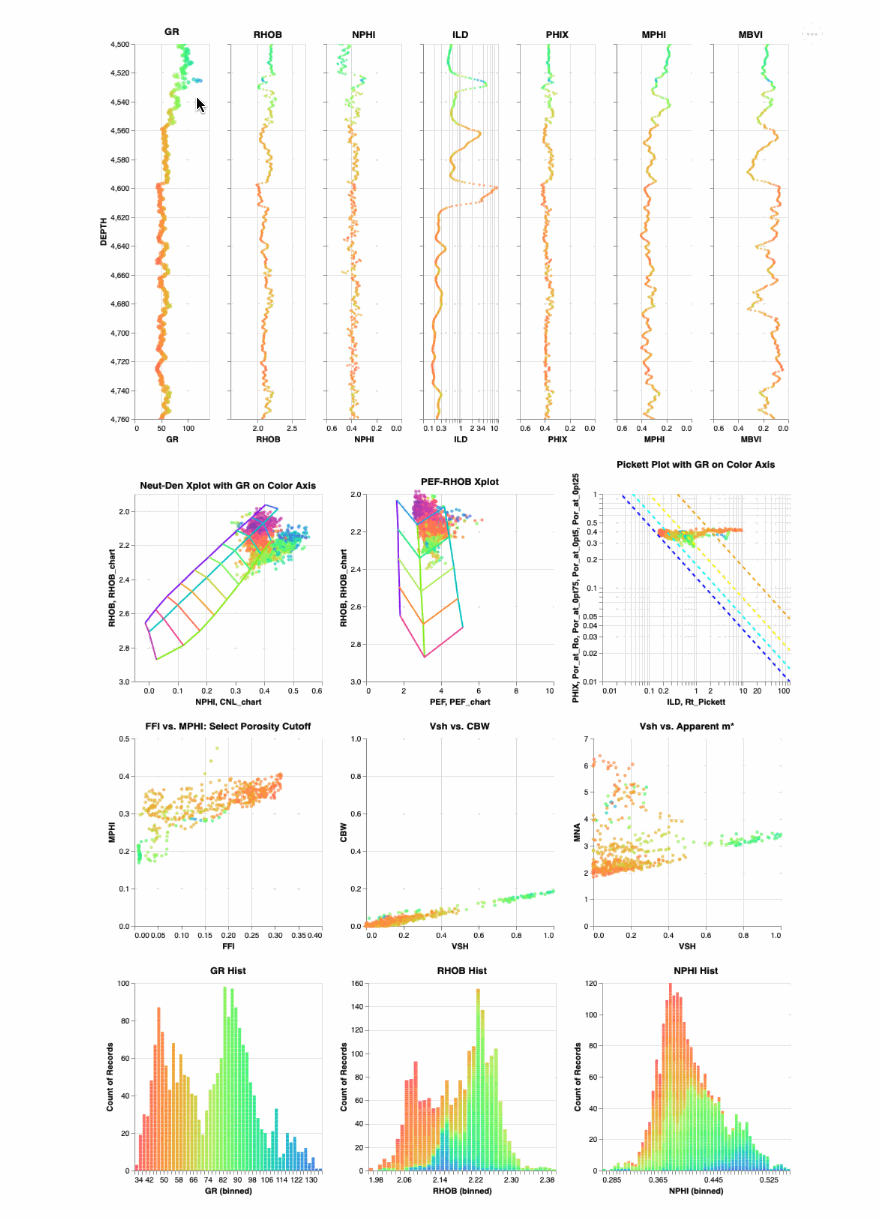

# Altair Example Code:
###  Python requirements:

In [1]:
from pandas import DataFrame, read_csv

import altair as alt
####alt.renderers.enable('altair_viewer')

import pandas as pd
import numpy as np
import altair_transform
import lasio
#import vega

#read the file
#file = r'GulfCoast_NMR.xlsx'
#df = pd.read_excel(file,index_col=False)



# 1) Load the Proper Chartbook Overlay Data:
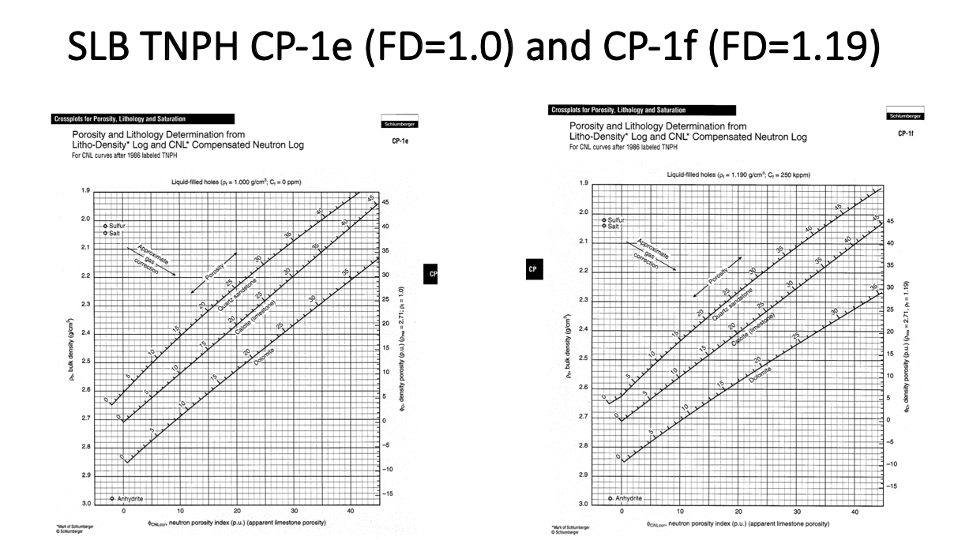
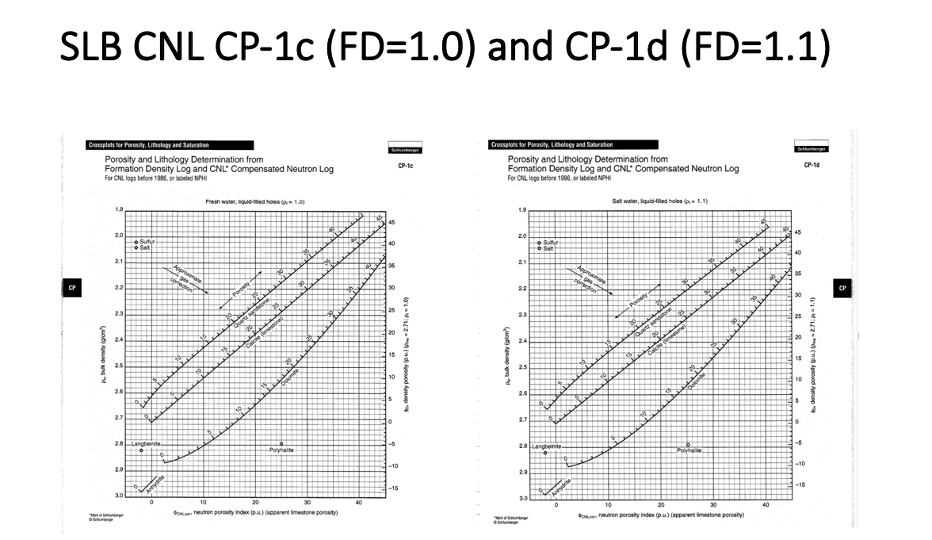

## Select the proper Neutron-Density Chart Overlay to be used: 

In [2]:
#select the proper Neutron-Denisity Chartbook file

#file = r'./data/cnl_chart_1pt0.xlsx'
file = r'./data/cnl_chart_1pt1.xlsx'
#file = r'./data/tnph_chart_1pt0.xlsx'
#file = r'./data/tnph_chart_1pt19.xlsx'



df_chart = pd.read_excel(file,index_col=False)
df_chart.head()

CNL_chart  RHOB_chart  Rho_matrix   Por Lith
0   0.026138    2.871983        2.87  0.00  Dol
1   0.119545    2.788218        2.87  0.05  Dol
2   0.176845    2.702874        2.87  0.10  Dol
3   0.226295    2.611207        2.87  0.15  Dol
4   0.270251    2.519540        2.87  0.20  Dol

## Load PEF vs. RHOB chart overlay:

In [3]:
#Load PEF vs. RHOB overlay chart

file = r'./data/PEF_Rhob_chart.xlsx'



df_pef = pd.read_excel(file,index_col=False)
df_pef.head()

PEF_chart  RHOB_chart  Por Lith
0      5.160       2.712  0.0   Ls
1      4.900       2.557  0.1   Ls
2      4.680       2.390  0.2   Ls
3      4.431       2.229  0.3   Ls
4      4.181       2.068  0.4   Ls

## Load Pickett Chart Data:

In [4]:
#select the proper Pickett data
#Adjust the Rw and m in the file designated below.


file = r'./data/Pickett_Ro_chart.xlsx'



df_pickett = pd.read_excel(file,index_col=False)
df_pickett.head()

Rt_Pickett  Por_at_Ro  Por_at_0pt75  Por_at_0pt5  Por_at_0pt25  \
0        0.01   1.663711      2.290333     3.593814      7.763067   
1        0.11   0.439062      0.604432     0.948427      2.048716   
2        0.21   0.306557      0.422019     0.662200      1.430431   
3        0.31   0.246913      0.339910     0.533361      1.152124   
4        0.41   0.211391      0.291010     0.456630      0.986376   

   Por_at_0pt1     Rw    m    n  
0    21.487649  0.025  1.8  2.0  
1     5.670710    NaN  NaN  NaN  
2     3.959338    NaN  NaN  NaN  
3     3.189001    NaN  NaN  NaN  
4     2.730221    NaN  NaN  NaN

# 2) Load log data in las format:
We will test dlisio to load dlis files also.

This is a Gulf Coast Shaley-Sand log analysis example with NMR data.

### We will first read in a las file using Lasio and then create a pandas DataFrame:
#### There is an issue with this format. The second line which is blank related to units and we have no units..   The depth plot routine will not read from this type of Pandas DataFrame.

In [5]:
las = lasio.read("./data/GulfCoast_NMR2.las")
df = las.df()
df.head(20)

Header section Parameter regexp=~P was not found.


BS  BVI  BVW     CALI  CBW    DRHO       DT  FFI       GR     ILD  \
DEPTH                                                                       
4000.0 NaN  NaN  NaN  10.8300  NaN  0.0030  92.0480  NaN  92.0480  0.7480   
4000.5 NaN  NaN  NaN  11.1512  NaN  0.0027  89.0188  NaN  89.0188  0.7503   
4001.0 NaN  NaN  NaN  10.9470  NaN  0.0060  87.8280  NaN  87.8280  0.7520   
4001.5 NaN  NaN  NaN  11.1852  NaN  0.0038  86.1570  NaN  86.1570  0.7557   
4002.0 NaN  NaN  NaN  11.3960  NaN  0.0030  87.1020  NaN  87.1020  0.7590   
4002.5 NaN  NaN  NaN  11.3663  NaN  0.0003  86.6840  NaN  86.6840  0.7613   
4003.0 NaN  NaN  NaN  10.9230  NaN  0.0020  88.2340  NaN  88.2340  0.7630   
4003.5 NaN  NaN  NaN  11.1030  NaN  0.0015  86.2360  NaN  86.2360  0.7642   
4004.0 NaN  NaN  NaN  11.0780  NaN  0.0040  87.0210  NaN  87.0210  0.7650   
4004.5 NaN  NaN  NaN  10.9400  NaN  0.0067  85.6867  NaN  85.6867  0.7672   
4005.0 NaN  NaN  NaN  10.9750  NaN  0.0100  85.9700  NaN  85.9700  0.7680   
4005.5 NaN  NaN  NaN  10.9912  NaN  0.0097  86.4540  NaN  86.4540  0.7683   
4006.0 NaN  NaN  NaN  10.6220  NaN  0.0080  88.1940  NaN  88.1940  0.7700   
4006.5 NaN  NaN  NaN  10.5360  NaN  0.0063  86.3415  NaN  86.3415  0.7747   
4007.0 NaN  NaN  NaN  10.6210  NaN  0.0080  85.0240  NaN  85.0240  0.7780   
4007.5 NaN  NaN  NaN  10.8557  NaN  0.0062  86.0700  NaN  86.0700  0.7840   
4008.0 NaN  NaN  NaN  10.7090  NaN  0.0070  90.4650  NaN  90.4650  0.7890   
4008.5 NaN  NaN  NaN  10.6580  NaN  0.0105  90.0973  NaN  90.0973  0.7973   
4009.0 NaN  NaN  NaN  10.6630  NaN  0.0130  93.4290  NaN  93.4290  0.8040   
4009.5 NaN  NaN  NaN  10.6607  NaN  0.0142  93.0287  NaN  93.0287  0.8135   

        ...  P7  P8     PEF      PHIX    RHOB    RMLL       SP  SW  T2_DIST  \
DEPTH   ...                                                                   
4000.0  ... NaN NaN  3.2990  0.367495  2.2080  0.7170 -29.8130 NaN      NaN   
4000.5  ... NaN NaN  3.4607  0.364825  2.2060  0.7205 -28.6983 NaN      NaN   
4001.0  ... NaN NaN  3.6540  0.364816  2.2060  0.7180 -28.1250 NaN      NaN   
4001.5  ... NaN NaN  3.3937  0.364717  2.2105  0.7347 -27.6047 NaN      NaN   
4002.0  ... NaN NaN  3.3570  0.363871  2.2180  0.7330 -27.1880 NaN      NaN   
4002.5  ... NaN NaN  3.3575  0.365650  2.2200  0.7482 -26.4692 NaN      NaN   
4003.0  ... NaN NaN  3.4700  0.362911  2.2250  0.7490 -27.2500 NaN      NaN   
4003.5  ... NaN NaN  3.5942  0.364037  2.2165  0.7558 -26.5208 NaN      NaN   
4004.0  ... NaN NaN  3.4250  0.365458  2.2240  0.7350 -26.6250 NaN      NaN   
4004.5  ... NaN NaN  3.3425  0.355982  2.2268  0.7277 -27.1355 NaN      NaN   
4005.0  ... NaN NaN  3.2100  0.354379  2.2410  0.7260 -27.8130 NaN      NaN   
4005.5  ... NaN NaN  3.3155  0.354154  2.2430  0.7472 -28.6250 NaN      NaN   
4006.0  ... NaN NaN  3.2680  0.354222  2.2430  0.7530 -28.0000 NaN      NaN   
4006.5  ... NaN NaN  3.2055  0.355680  2.2350  0.7568 -27.8855 NaN      NaN   
4007.0  ... NaN NaN  3.2030  0.358560  2.2350  0.7560 -27.9380 NaN      NaN   
4007.5  ... NaN NaN  3.2968  0.358327  2.2395  0.7560 -28.0422 NaN      NaN   
4008.0  ... NaN NaN  3.4360  0.358154  2.2420  0.7660 -28.5630 NaN      NaN   
4008.5  ... NaN NaN  3.3188  0.353999  2.2492  0.7738 -27.5938 NaN      NaN   
4009.0  ... NaN NaN  3.2380  0.353601  2.2550  0.7780 -27.4380 NaN      NaN   
4009.5  ... NaN NaN  3.0963  0.349787  2.2568  0.7922 -26.5108 NaN      NaN   

        VSH  
DEPTH        
4000.0  NaN  
4000.5  NaN  
4001.0  NaN  
4001.5  NaN  
4002.0  NaN  
4002.5  NaN  
4003.0  NaN  
4003.5  NaN  
4004.0  NaN  
4004.5  NaN  
4005.0  NaN  
4005.5  NaN  
4006.0  NaN  
4006.5  NaN  
4007.0  NaN  
4007.5  NaN  
4008.0  NaN  
4008.5  NaN  
4009.0  NaN  
4009.5  NaN  

[20 rows x 37 columns]

### Convert the DataFrame so that the DataFrame header is all on one line:
This might be a cheap trick where there is a more elegant solution????

In [6]:
df = df.rename_axis('DEPTH').reset_index()
df.head(20)

DEPTH  BS  BVI  BVW     CALI  CBW    DRHO       DT  FFI       GR  ...  \
0   4000.0 NaN  NaN  NaN  10.8300  NaN  0.0030  92.0480  NaN  92.0480  ...   
1   4000.5 NaN  NaN  NaN  11.1512  NaN  0.0027  89.0188  NaN  89.0188  ...   
2   4001.0 NaN  NaN  NaN  10.9470  NaN  0.0060  87.8280  NaN  87.8280  ...   
3   4001.5 NaN  NaN  NaN  11.1852  NaN  0.0038  86.1570  NaN  86.1570  ...   
4   4002.0 NaN  NaN  NaN  11.3960  NaN  0.0030  87.1020  NaN  87.1020  ...   
5   4002.5 NaN  NaN  NaN  11.3663  NaN  0.0003  86.6840  NaN  86.6840  ...   
6   4003.0 NaN  NaN  NaN  10.9230  NaN  0.0020  88.2340  NaN  88.2340  ...   
7   4003.5 NaN  NaN  NaN  11.1030  NaN  0.0015  86.2360  NaN  86.2360  ...   
8   4004.0 NaN  NaN  NaN  11.0780  NaN  0.0040  87.0210  NaN  87.0210  ...   
9   4004.5 NaN  NaN  NaN  10.9400  NaN  0.0067  85.6867  NaN  85.6867  ...   
10  4005.0 NaN  NaN  NaN  10.9750  NaN  0.0100  85.9700  NaN  85.9700  ...   
11  4005.5 NaN  NaN  NaN  10.9912  NaN  0.0097  86.4540  NaN  86.4540  ...   
12  4006.0 NaN  NaN  NaN  10.6220  NaN  0.0080  88.1940  NaN  88.1940  ...   
13  4006.5 NaN  NaN  NaN  10.5360  NaN  0.0063  86.3415  NaN  86.3415  ...   
14  4007.0 NaN  NaN  NaN  10.6210  NaN  0.0080  85.0240  NaN  85.0240  ...   
15  4007.5 NaN  NaN  NaN  10.8557  NaN  0.0062  86.0700  NaN  86.0700  ...   
16  4008.0 NaN  NaN  NaN  10.7090  NaN  0.0070  90.4650  NaN  90.4650  ...   
17  4008.5 NaN  NaN  NaN  10.6580  NaN  0.0105  90.0973  NaN  90.0973  ...   
18  4009.0 NaN  NaN  NaN  10.6630  NaN  0.0130  93.4290  NaN  93.4290  ...   
19  4009.5 NaN  NaN  NaN  10.6607  NaN  0.0142  93.0287  NaN  93.0287  ...   

    P7  P8     PEF      PHIX    RHOB    RMLL       SP  SW  T2_DIST  VSH  
0  NaN NaN  3.2990  0.367495  2.2080  0.7170 -29.8130 NaN      NaN  NaN  
1  NaN NaN  3.4607  0.364825  2.2060  0.7205 -28.6983 NaN      NaN  NaN  
2  NaN NaN  3.6540  0.364816  2.2060  0.7180 -28.1250 NaN      NaN  NaN  
3  NaN NaN  3.3937  0.364717  2.2105  0.7347 -27.6047 NaN      NaN  NaN  
4  NaN NaN  3.3570  0.363871  2.2180  0.7330 -27.1880 NaN      NaN  NaN  
5  NaN NaN  3.3575  0.365650  2.2200  0.7482 -26.4692 NaN      NaN  NaN  
6  NaN NaN  3.4700  0.362911  2.2250  0.7490 -27.2500 NaN      NaN  NaN  
7  NaN NaN  3.5942  0.364037  2.2165  0.7558 -26.5208 NaN      NaN  NaN  
8  NaN NaN  3.4250  0.365458  2.2240  0.7350 -26.6250 NaN      NaN  NaN  
9  NaN NaN  3.3425  0.355982  2.2268  0.7277 -27.1355 NaN      NaN  NaN  
10 NaN NaN  3.2100  0.354379  2.2410  0.7260 -27.8130 NaN      NaN  NaN  
11 NaN NaN  3.3155  0.354154  2.2430  0.7472 -28.6250 NaN      NaN  NaN  
12 NaN NaN  3.2680  0.354222  2.2430  0.7530 -28.0000 NaN      NaN  NaN  
13 NaN NaN  3.2055  0.355680  2.2350  0.7568 -27.8855 NaN      NaN  NaN  
14 NaN NaN  3.2030  0.358560  2.2350  0.7560 -27.9380 NaN      NaN  NaN  
15 NaN NaN  3.2968  0.358327  2.2395  0.7560 -28.0422 NaN      NaN  NaN  
16 NaN NaN  3.4360  0.358154  2.2420  0.7660 -28.5630 NaN      NaN  NaN  
17 NaN NaN  3.3188  0.353999  2.2492  0.7738 -27.5938 NaN      NaN  NaN  
18 NaN NaN  3.2380  0.353601  2.2550  0.7780 -27.4380 NaN      NaN  NaN  
19 NaN NaN  3.0963  0.349787  2.2568  0.7922 -26.5108 NaN      NaN  NaN  

[20 rows x 38 columns]

# 3) Use Interactive Altair over Entire Well Interval: 
### Now we can work with Altair Interactivity Depth, Cross Plots and Histograms:

In [7]:
#interval = alt.selection_interval()
#vega.scheme('lith', ['#ffa500', '#ff00ff', '#0000ff']);
interval = alt.selection_interval()

'''
   Define Zone of Interest for the depth plots. Xplots??? Histograms??? 
'''
top    = 4000
bottom = 5000


base=alt.Chart(df).mark_point().encode(
    alt.Y('DEPTH:Q',
        scale=alt.Scale(domain=(bottom, top))
    ),
).properties(
    width=100,
    height=500,
    #title='GR',
    selection=interval
)



base2=alt.Chart(df).mark_point().encode(
    alt.Y('DEPTH:Q',
        scale=alt.Scale(domain=(bottom, top)), axis=alt.Axis(labels=False),title='',
    ),
).properties(
    width=100,
    height=500,
    title='',
    selection=interval
)




gr = base.mark_circle(size=30).encode(
    x='GR:Q',  
    #size=('PHIX:Q'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(domain=(0, 150),scheme='rainbow'),legend=None),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='GR:Q', 
).properties(
    title='GR',
    selection=interval
)


rhob = base2.mark_circle(clip=True , size=10).encode(
    alt.X('RHOB:Q',
        scale=alt.Scale(domain=(1.65, 2.65))
    ),     
    #color=alt.value('red'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='RHOB:Q', 
).properties(
    title='RHOB',
    selection=interval
)


nphi = base2.mark_circle(size=10).encode(
    alt.X('NPHI:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),     
    #y=('DEPTH'),
    #color=alt.value('green'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='NPHI:Q', 
).properties(
    title='NPHI',
    selection=interval
)


rt = base2.mark_circle(size=10).encode(
    alt.X('ILD:Q', 
          scale=alt.Scale(type='log', domain=(0.1, 1000))
    ),
    #x='LRT:Q',  
    #y=('DEPTH'),
    #color=alt.value('black'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='ILD:Q', 
).properties(
    title='ILD',
    selection=interval
)




phit = base2.mark_circle(size=10).encode(
    alt.X('PHIX:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),    
    #color=alt.value('blue'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='PHIX:Q', 
).properties(
    title='PHIX',
    selection=interval
)

mbvi = base2.mark_circle(size=10).encode(
    alt.X('MBVI:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),    
    #color=alt.value('blue'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='MBVI:Q', 
).properties(
    title='MBVI',
    selection=interval
)

mphi = base2.mark_circle(size=10).encode(
    alt.X('MPHI:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),    
    #color=alt.value('red'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='MPHI:Q', 
).properties(
    title='MPHI',
    selection=interval
)





nd_chart = alt.Chart(df_chart).mark_line().encode(
    alt.X('CNL_chart:Q',
        scale=alt.Scale(domain=(-0.05, 0.6))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 1.9))
    ),    
    color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)

nd_chart2 = alt.Chart(df_chart).mark_line().encode(
    alt.X('CNL_chart:Q',
        scale=alt.Scale(domain=(-0.05, 0.6))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 1.9))
    ),    
    color=alt.condition(interval, 'Por:O', alt.value('black'),scale=alt.Scale(scheme='rainbow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)

ndxplot = base.mark_circle(size=20).encode(
    alt.X('NPHI:Q',
        scale=alt.Scale(domain=(-0.05, 0.6))
    ),    
    alt.Y('RHOB:Q',
        scale=alt.Scale(domain=(3, 1.9))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='GR:Q', 
).properties(
    title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250,
    selection=interval
)


pef_chart = alt.Chart(df_pef).mark_line().encode(
    alt.X('PEF_chart:Q',
        scale=alt.Scale(domain=(0, 10))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 2))
    ),    
    color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)



pef_chart2 = alt.Chart(df_pef).mark_line().encode(
    alt.X('PEF_chart:Q',
        scale=alt.Scale(domain=(0, 10))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 2))
    ),    
    color=alt.condition(interval, 'Por:O', alt.value('black'),scale=alt.Scale(scheme='rainbow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)

pefxplot = base.mark_circle(size=20).encode(
    alt.X('PEF:Q',
        scale=alt.Scale(domain=(0, 10))
    ),    
    alt.Y('RHOB:Q',
        scale=alt.Scale(domain=(3, 2))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='PEF:Q', 
).properties(
    title='PEF-RHOB Xplot',
    width=250,
    height=250,
    selection=interval
)



pickett_chart = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]  ).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 100))
    ),    
    alt.Y('Por_at_Ro:Q',
        scale=alt.Scale(type='log',domain=(0.05, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('blue'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)

pickett_chart8 = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 100))
    ),    
    alt.Y('Por_at_0pt75:Q',
        scale=alt.Scale(type='log',domain=(0.05, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('cyan'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)
pickett_chart6 = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]  ).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 100))
    ),    
    alt.Y('Por_at_0pt5:Q',
        scale=alt.Scale(type='log',domain=(0.05, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('orange'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)
pickett_chart4 = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]  ).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 100))
    ),    
    alt.Y('Por_at_0pt25:Q',
        scale=alt.Scale(type='log',domain=(0.05, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('red'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)

pickett = base.mark_circle(size=20).encode(
    alt.X('ILD:Q',
        scale=alt.Scale(type='log',domain=(.01, 100))
    ),    
    alt.Y('PHIX:Q',
        scale=alt.Scale(type='log',domain=(.05, 1))
    ),    
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='ILD:Q', 
).properties(
    title='Pickett Plot',
    width=250,
    height=250,
    selection=interval
)



nmr = base.mark_circle(size=20).encode(
    alt.X('FFI:Q',
        scale=alt.Scale(domain=(0, .4))
    ),    
    alt.Y('MPHI:Q',
        scale=alt.Scale(domain=(0, .5))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='FFI:Q', 
).properties(
    title='FFI vs. MPHI: Select Porosity Cutoff',
    width=250,
    height=250,
    selection=interval
)

line1 = nmr.transform_regression('MFFI:Q', 'MPHI:Q').mark_line()

cbw = base.mark_circle(size=20).encode(
    alt.X('VSH:Q',
        scale=alt.Scale(domain=(0,1))
    ),    
    alt.Y('CBW:Q',
        scale=alt.Scale(domain=(0, 1))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='CBW:Q', 
).properties(
    title='Vsh vs. CBW',
    width=250,
    height=250,
    selection=interval
)

mna = base.mark_circle(size=20).encode(
    alt.X('VSH:Q',
        scale=alt.Scale(domain=(0, 1))
    ),    
    alt.Y('MNA:Q',
        scale=alt.Scale(domain=(0, 7))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='MNA:Q', 
).properties(
    title='Vsh vs. Apparent m*',
    width=250,
    height=250,
    selection=interval
)






grhist = alt.Chart(df).mark_bar().encode(
    alt.X("GR:Q", bin=alt.Bin(maxbins=75)),
    y='count()',
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),    
).properties(
    title='GR Hist',
    width=250,
    height=250,
    selection=interval
)

rhobhist = alt.Chart(df).mark_bar().encode(
    alt.X("RHOB:Q", bin=alt.Bin(maxbins=75)),
    y='count()',
    #color=alt.value('red'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
).properties(
    title='RHOB Hist',
    width=250,
    height=250,
    selection=interval
)

nphihist = alt.Chart(df).mark_bar().encode(
    alt.X("NPHI:Q", bin=alt.Bin(maxbins=75)),
    y='count()',
    #color=alt.value('green'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
).properties(
    title='NPHI Hist',
    width=250,
    height=250,
    selection=interval
)

depth = gr | rhob | nphi | rt | phit | mphi | mbvi 

xplot = ndxplot+nd_chart+nd_chart2| pefxplot+pef_chart+pef_chart2 |pickett+pickett_chart+pickett_chart8+pickett_chart6+pickett_chart4  

ws = nmr | cbw | mna

hist =  grhist | rhobhist | nphihist

depth & xplot & ws & hist

alt.VConcatChart(...)

# 4) Perform Zonal Processing: define zone of interest and clip data for Zonal Depth Plot: 

In [8]:
#interval = alt.selection_interval()
#vega.scheme('basic', ['#f00', '#0f0', '#00f', '#ff0', '#f0f', '#0ff']);
interval = alt.selection_interval()

'''
   Define Zone of Interest for the depth plots. Xplots??? Histograms??? 
'''
top    = 4500
bottom = 4750


base=alt.Chart(df).mark_point(clip=True).encode(
    alt.Y('DEPTH:Q',
        scale=alt.Scale(domain=(bottom, top))
    ),
).properties(
    width=100,
    height=500,
    #title='GR',
    selection=interval
)



base2=alt.Chart(df).mark_point(clip=True).encode(
    alt.Y('DEPTH:Q',
        scale=alt.Scale(domain=(bottom, top)), axis=alt.Axis(labels=False),title='',
    ),
).properties(
    width=100,
    height=500,
    title='',
    selection=interval
)




gr = base.mark_circle(clip=True, size=30).encode(
    x='GR:Q',  
    #size=('PHIX:Q'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(domain=(0, 150),scheme='rainbow'),legend=None),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='GR:Q', 
).properties(
    title='GR',
    selection=interval
)


rhob = base2.mark_circle(clip=True , size=10).encode(
    alt.X('RHOB:Q',
        scale=alt.Scale(domain=(1.65, 2.65))
    ),     
    #color=alt.value('red'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='RHOB:Q', 
).properties(
    title='RHOB',
    selection=interval
)


nphi = base2.mark_circle(clip=True, size=10).encode(
    alt.X('NPHI:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),     
    #y=('DEPTH'),
    #color=alt.value('green'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='NPHI:Q', 
).properties(
    title='NPHI',
    selection=interval
)


rt = base2.mark_circle(clip=True, size=10).encode(
    alt.X('ILD:Q', 
          scale=alt.Scale(type='log', domain=(0.1, 1000))
    ),
    #x='LRT:Q',  
    #y=('DEPTH'),
    #color=alt.value('black'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='ILD:Q', 
).properties(
    title='ILD',
    selection=interval
)




phit = base2.mark_circle(clip=True, size=10).encode(
    alt.X('PHIX:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),    
    #color=alt.value('blue'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='PHIX:Q', 
).properties(
    title='PHIX',
    selection=interval
)

mbvi = base2.mark_circle(clip=True, size=10).encode(
    alt.X('MBVI:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),    
    #color=alt.value('blue'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='MBVI:Q', 
).properties(
    title='MBVI',
    selection=interval
)

mphi = base2.mark_circle(clip=True, size=10).encode(
    alt.X('MPHI:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),    
    #color=alt.value('red'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='MPHI:Q', 
).properties(
    title='MPHI',
    selection=interval
)





nd_chart = alt.Chart(df_chart).mark_line().encode(
    alt.X('CNL_chart:Q',
        scale=alt.Scale(domain=(-0.05, 0.6))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 1.9))
    ),    
    color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)

nd_chart2 = alt.Chart(df_chart).mark_line().encode(
    alt.X('CNL_chart:Q',
        scale=alt.Scale(domain=(-0.05, 0.6))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 1.9))
    ),    
    color=alt.condition(interval, 'Por:O', alt.value('black'),scale=alt.Scale(scheme='rainbow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)

ndxplot = base.mark_circle(size=20).encode(
    alt.X('NPHI:Q',
        scale=alt.Scale(domain=(-0.05, 0.6))
    ),    
    alt.Y('RHOB:Q',
        scale=alt.Scale(domain=(3, 1.9))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='GR:Q', 
).properties(
    title='Neut vs. Den Xplot with GR on Color Axis',
    width=250,
    height=250,
    selection=interval
)

pef_chart = alt.Chart(df_pef).mark_line().encode(
    alt.X('PEF_chart:Q',
        scale=alt.Scale(domain=(0, 10))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 2))
    ),    
    color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)



pef_chart2 = alt.Chart(df_pef).mark_line().encode(
    alt.X('PEF_chart:Q',
        scale=alt.Scale(domain=(0, 10))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 2))
    ),    
    color=alt.condition(interval, 'Por:O', alt.value('black'),scale=alt.Scale(scheme='rainbow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)

pefxplot = base.mark_circle(size=20).encode(
    alt.X('PEF:Q',
        scale=alt.Scale(domain=(0, 10))
    ),    
    alt.Y('RHOB:Q',
        scale=alt.Scale(domain=(3, 2))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='PEF:Q', 
).properties(
    title='PEF vs. RHOB Xplot',
    width=250,
    height=250,
    selection=interval
)




pickett_chart = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]  ).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 100))
    ),    
    alt.Y('Por_at_Ro:Q',
        scale=alt.Scale(type='log',domain=(0.05, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('blue'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)

pickett_chart8 = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 100))
    ),    
    alt.Y('Por_at_0pt75:Q',
        scale=alt.Scale(type='log',domain=(0.05, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('cyan'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)
pickett_chart6 = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]  ).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 100))
    ),    
    alt.Y('Por_at_0pt5:Q',
        scale=alt.Scale(type='log',domain=(0.05, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('yellow'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)
pickett_chart4 = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]  ).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 100))
    ),    
    alt.Y('Por_at_0pt25:Q',
        scale=alt.Scale(type='log',domain=(0.05, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('orange'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)
pickett_chart2 = alt.Chart(df_pickett).mark_line(clip=True , size=2 ,strokeDash=[5,5] ).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 100))
    ),    
    alt.Y('Por_at_0pt1:Q',
        scale=alt.Scale(type='log',domain=(0.05, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('red'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)
pickett = base.mark_circle(size=20).encode(
    alt.X('ILD:Q',
        scale=alt.Scale(type='log',domain=(.01, 100))
    ),    
    alt.Y('PHIX:Q',
        scale=alt.Scale(type='log',domain=(.05, 1))
    ),    
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='ILD:Q', 
).properties(
    title='Pickett Plot',
    width=250,
    height=250,
    selection=interval
)



nmr = base.mark_circle(size=20).encode(
    alt.X('FFI:Q',
        scale=alt.Scale(domain=(0, .4))
    ),    
    alt.Y('MPHI:Q',
        scale=alt.Scale(domain=(0, .5))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='FFI:Q', 
).properties(
    title='MFFI vs. MPHI: Select Porosity Cutoff',
    width=250,
    height=250,
    selection=interval
)

line1 = nmr.transform_regression('FFI:Q', 'MPHI:Q').mark_line()

cbw = base.mark_circle(size=20).encode(
    alt.X('VSH:Q',
        scale=alt.Scale(domain=(0,1))
    ),    
    alt.Y('CBW:Q',
        scale=alt.Scale(domain=(0, 1))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='GR:Q', 
).properties(
    title='Vsh vs. CBW',
    width=250,
    height=250,
    selection=interval
)

mna = base.mark_circle(size=20).encode(
    alt.X('VSH:Q',
        scale=alt.Scale(domain=(0, 1))
    ),    
    alt.Y('MNA:Q',
        scale=alt.Scale(domain=(0, 7))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='MNA:Q', 
).properties(
    title='Vsh vs. Apparent m*',
    width=250,
    height=250,
    selection=interval
)



grhist = alt.Chart(df).mark_bar().encode(
    alt.X("GR:Q", bin=alt.Bin(maxbins=75)),
    y='count()',
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),    
).properties(
    title='GR Hist',
    width=250,
    height=250,
    selection=interval
)

rhobhist = alt.Chart(df).mark_bar().encode(
    alt.X("RHOB:Q", bin=alt.Bin(maxbins=75)),
    y='count()',
    #color=alt.value('red'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
).properties(
    title='RHOB Hist',
    width=250,
    height=250,
    selection=interval
)

nphihist = alt.Chart(df).mark_bar().encode(
    alt.X("NPHI:Q", bin=alt.Bin(maxbins=75)),
    y='count()',
    #color=alt.value('green'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
).properties(
    title='NPHI Hist',
    width=250,
    height=250,
    selection=interval
)

depth = gr | rhob | nphi | rt | phit | mphi | mbvi 

xplot = ndxplot+nd_chart+nd_chart2| pefxplot+pef_chart+pef_chart2 |pickett+pickett_chart+pickett_chart8+pickett_chart6+pickett_chart4  

ws = nmr | cbw | mna

hist =  grhist | rhobhist | nphihist

depth & xplot & ws & hist

alt.VConcatChart(...)

# To Web Browser

In [9]:
#interval = alt.selection_interval()
#vega.scheme('basic', ['#f00', '#0f0', '#00f', '#ff0', '#f0f', '#0ff']);
interval = alt.selection_interval()

'''
   Define Zone of Interest for the depth plots. Xplots??? Histograms??? 
'''
top    = 4500
bottom = 4750


base=alt.Chart(df).mark_point(clip=True).encode(
    alt.Y('DEPTH:Q',
        scale=alt.Scale(domain=(bottom, top))
    ),
).properties(
    width=100,
    height=500,
    #title='GR',
    selection=interval
)



base2=alt.Chart(df).mark_point(clip=True).encode(
    alt.Y('DEPTH:Q',
        scale=alt.Scale(domain=(bottom, top)), axis=alt.Axis(labels=False),title='',
    ),
).properties(
    width=100,
    height=500,
    title='',
    selection=interval
)




gr = base.mark_circle(clip=True, size=30).encode(
    x='GR:Q',  
    #size=('PHIX:Q'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(domain=(0, 150),scheme='rainbow'),legend=None),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='GR:Q', 
).properties(
    title='GR',
    selection=interval
)


rhob = base2.mark_circle(clip=True , size=10).encode(
    alt.X('RHOB:Q',
        scale=alt.Scale(domain=(1.65, 2.65))
    ),     
    #color=alt.value('red'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='RHOB:Q', 
).properties(
    title='RHOB',
    selection=interval
)


nphi = base2.mark_circle(clip=True, size=10).encode(
    alt.X('NPHI:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),     
    #y=('DEPTH'),
    #color=alt.value('green'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='NPHI:Q', 
).properties(
    title='NPHI',
    selection=interval
)


rt = base2.mark_circle(clip=True, size=10).encode(
    alt.X('ILD:Q', 
          scale=alt.Scale(type='log', domain=(0.1, 1000))
    ),
    #x='LRT:Q',  
    #y=('DEPTH'),
    #color=alt.value('black'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='ILD:Q', 
).properties(
    title='ILD',
    selection=interval
)




phit = base2.mark_circle(clip=True, size=10).encode(
    alt.X('PHIX:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),    
    #color=alt.value('blue'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='PHIX:Q', 
).properties(
    title='PHIX',
    selection=interval
)

mbvi = base2.mark_circle(clip=True, size=10).encode(
    alt.X('MBVI:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),    
    #color=alt.value('blue'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='MBVI:Q', 
).properties(
    title='MBVI',
    selection=interval
)

mphi = base2.mark_circle(clip=True, size=10).encode(
    alt.X('MPHI:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),    
    #color=alt.value('red'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='MPHI:Q', 
).properties(
    title='MPHI',
    selection=interval
)





nd_chart = alt.Chart(df_chart).mark_line().encode(
    alt.X('CNL_chart:Q',
        scale=alt.Scale(domain=(-0.05, 0.6))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 1.9))
    ),    
    color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)

nd_chart2 = alt.Chart(df_chart).mark_line().encode(
    alt.X('CNL_chart:Q',
        scale=alt.Scale(domain=(-0.05, 0.6))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 1.9))
    ),    
    color=alt.condition(interval, 'Por:O', alt.value('black'),scale=alt.Scale(scheme='rainbow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)

ndxplot = base.mark_circle(size=20).encode(
    alt.X('NPHI:Q',
        scale=alt.Scale(domain=(-0.05, 0.6))
    ),    
    alt.Y('RHOB:Q',
        scale=alt.Scale(domain=(3, 1.9))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='GR:Q', 
).properties(
    title='Neut vs. Den Xplot with GR on Color Axis',
    width=250,
    height=250,
    selection=interval
)

pef_chart = alt.Chart(df_pef).mark_line().encode(
    alt.X('PEF_chart:Q',
        scale=alt.Scale(domain=(0, 10))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 2))
    ),    
    color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)



pef_chart2 = alt.Chart(df_pef).mark_line().encode(
    alt.X('PEF_chart:Q',
        scale=alt.Scale(domain=(0, 10))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 2))
    ),    
    color=alt.condition(interval, 'Por:O', alt.value('black'),scale=alt.Scale(scheme='rainbow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)

pefxplot = base.mark_circle(size=20).encode(
    alt.X('PEF:Q',
        scale=alt.Scale(domain=(0, 10))
    ),    
    alt.Y('RHOB:Q',
        scale=alt.Scale(domain=(3, 2))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='PEF:Q', 
).properties(
    title='PEF vs. RHOB Xplot',
    width=250,
    height=250,
    selection=interval
)



pickett_chart = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]  ).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 100))
    ),    
    alt.Y('Por_at_Ro:Q',
        scale=alt.Scale(type='log',domain=(0.05, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('blue'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)

pickett_chart8 = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 100))
    ),    
    alt.Y('Por_at_0pt75:Q',
        scale=alt.Scale(type='log',domain=(0.05, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('cyan'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)
pickett_chart6 = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]  ).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 100))
    ),    
    alt.Y('Por_at_0pt5:Q',
        scale=alt.Scale(type='log',domain=(0.05, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('yellow'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)
pickett_chart4 = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]  ).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 100))
    ),    
    alt.Y('Por_at_0pt25:Q',
        scale=alt.Scale(type='log',domain=(0.05, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('orange'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)
pickett_chart2 = alt.Chart(df_pickett).mark_line(clip=True , size=2 ,strokeDash=[5,5] ).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 100))
    ),    
    alt.Y('Por_at_0pt1:Q',
        scale=alt.Scale(type='log',domain=(0.05, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('red'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)
pickett = base.mark_circle(size=20).encode(
    alt.X('ILD:Q',
        scale=alt.Scale(type='log',domain=(.01, 100))
    ),    
    alt.Y('PHIX:Q',
        scale=alt.Scale(type='log',domain=(.05, 1))
    ),    
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='ILD:Q', 
).properties(
    title='Pickett Plot',
    width=250,
    height=250,
    selection=interval
)

nmr = base.mark_circle(size=20).encode(
    alt.X('FFI:Q',
        scale=alt.Scale(domain=(0, .4))
    ),    
    alt.Y('MPHI:Q',
        scale=alt.Scale(domain=(0, .5))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='FFI:Q', 
).properties(
    title='FFI vs. MPHI: Select Porosity Cutoff',
    width=250,
    height=250,
    selection=interval
)

line1 = nmr.transform_regression('FFI:Q', 'MPHI:Q').mark_line()

cbw = base.mark_circle(size=20).encode(
    alt.X('VSH:Q',
        scale=alt.Scale(domain=(0,1))
    ),    
    alt.Y('CBW:Q',
        scale=alt.Scale(domain=(0, 1))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='CBW:Q', 
).properties(
    title='Vsh vs. CBW',
    width=250,
    height=250,
    selection=interval
)

mna = base.mark_circle(size=20).encode(
    alt.X('VSH:Q',
        scale=alt.Scale(domain=(0, 1))
    ),    
    alt.Y('MNA:Q',
        scale=alt.Scale(domain=(0, 7))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='MNA:Q', 
).properties(
    title='Vsh vs. Apparent m*',
    width=250,
    height=250,
    selection=interval
)



grhist = alt.Chart(df).mark_bar().encode(
    alt.X("GR:Q", bin=alt.Bin(maxbins=75)),
    y='count()',
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),    
).properties(
    title='GR Hist',
    width=250,
    height=250,
    selection=interval
)

rhobhist = alt.Chart(df).mark_bar().encode(
    alt.X("RHOB:Q", bin=alt.Bin(maxbins=75)),
    y='count()',
    #color=alt.value('red'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
).properties(
    title='RHOB Hist',
    width=250,
    height=250,
    selection=interval
)

nphihist = alt.Chart(df).mark_bar().encode(
    alt.X("NPHI:Q", bin=alt.Bin(maxbins=75)),
    y='count()',
    #color=alt.value('green'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
).properties(
    title='NPHI Hist',
    width=250,
    height=250,
    selection=interval
)

depth = gr | rhob | nphi | rt | phit | mphi | mbvi 

xplot = ndxplot+nd_chart+nd_chart2| pefxplot+pef_chart+pef_chart2 |pickett+pickett_chart+pickett_chart8+pickett_chart6+pickett_chart4  

ws = nmr | cbw | mna

hist =  grhist | rhobhist | nphihist

plot = depth & xplot & ws & hist

plot.show()  

Displaying chart at http://localhost:15380/


### Matrix Plots using Altair: still in test mode

In [10]:
source = df
interval = alt.selection_interval()
alt.Chart(source).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    
    opacity=alt.value(0.1),
    color=alt.value('red')
    
    
    #scale=alt.Scale(scheme='rainbow')
).properties(
    width=150,
    height=150
).repeat(
    row=['GR', 'NPHI', 'RHOB', 'LRT'],
    column=['GR', 'NPHI', 'RHOB', 'LRT']
).interactive()

alt.RepeatChart(...)

In [11]:
import altair as alt

# load a simple dataset as a pandas DataFrame
from vega_datasets import data
cars = data.cars()

chart = alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

chart.show()

Displaying chart at http://localhost:15380/
